# Proyecto 2. Entrega 3: Naive Bayes
### Integrantes
- Nelson García  
- Diego Linares
- Joaquin Puente
- José Mérida
- Joaquín Campos

Las secciones de análisis exploratorio y separación del modelo se realizaron en la entrega anterior, sin embargo consideramos importante tener esta información a la mano para poder referenciarla dentro de este mismo documento.

## Análisis exploratorio

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn import metrics

### Carga de Datos y Revisión General

In [62]:
# estaremos definiendo ambos csvs para poder tener acceso a ambos pero usaremos el train y luego sobre el test replicaremos una vez se considere importante

# Definir NA como nuestros NaN
dftrain = pd.read_csv("train.csv", na_values=["NA"])

# incluimos en el analissi exploratorio lo basico para poder tenerlo a la mano
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
# datos estadísticos básicos
dftrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [64]:
# tipos
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
# Revisamos posibles variables redundantes entre sí mismas
print(dftrain.nunique())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64


### Separación de Columnas por Tipo de Variable
Algunas columnas cómo MSSubClass son categóricas nominales y cuentan con valores numéricos, además algunas otras columnas cómo pueden ser las de clasificación de estado son ordinales y tienen un encoding categórico (ej. Ex - Excelente en ExterCond). Es importante que clasifiquemos las diferentes variables para poder llevar a cabo el encoding de manera correcta y realizar nuestro análisis exploratorio. Tenemos 3 categorías:

- Ordinales
- Nominales
- Numéricas

Este proceso se lleva a cabo antes de depurar las columnas que no se utilizarán en el procesamiento de datos para evitar la necesidad de mantener en mente las columnas eliminadas al categorizar.

In [66]:
col_ordinales = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                 'BsmtExposure', 'HeatingQC',  'GarageQual', 'GarageCond', 'FireplaceQu',  'Functional',
                 'KitchenQual', 'PoolQC', 'Fence']
col_nominales = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
                 'GarageFinish','GarageType','PavedDrive', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
col_numericas = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

Definimos una función para retornar el tipo de variable de cada columna

In [67]:
def get_type(col):
  if col in col_numericas + ['SalePrice']:
    return 'numerica'
  elif col in col_nominales:
    return 'nominal'
  elif col in col_ordinales:
    return 'ordinal'

Verificamos que todas las columnas se hayan ingresado correctamente

In [68]:
unassigned = []
for col in dftrain.columns:
  if get_type(col) == None:
    unassigned.append(col)

print(unassigned)

['Id']


### Datos Faltantes
En este paso vamos a analizar datos faltantes

Primero verificamos las columnas con valores nulos, para tener una mejor idea de que necesitamos hacer

In [69]:
missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


Nos damos cuenta que PoolQC tiene 99.5% de valores faltantes, ¿Por qué?

Algunas de las variables categóricas tienen cómo categoría "NA" y se toma como valor nulo al cargar los datos al DF. Creamos una lista con las variables que cuentan con esta característica

In [70]:
na_as_data_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                   'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence', 'MiscFeature',
                   'MasVnrType', 'GarageQual', 'GarageCond']

dftrain[na_as_data_cols] = dftrain[na_as_data_cols].fillna('Missing')

Revisando nuevamente las columnas con valores nulos

In [71]:
missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


Ahora tenemos valores faltantes más manejables, primero vamos a tomar LotFrontage y GarageYrBlt y reemplazar los valores faltantes con la mediana. Esto debido a que el 17.73% y 5.54% siguen siendo cifras bastante significativas y no podemos simplemente eliminar estas filas.

In [72]:
cols_to_fill = ['LotFrontage', 'GarageYrBlt']

medians = dftrain[cols_to_fill].median()

dftrain[cols_to_fill] = dftrain[cols_to_fill].fillna(medians)

Revisando nuevamente los valores nulos

In [73]:
missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

MasVnrArea       0.547945
Electrical       0.068493
MSZoning         0.000000
MSSubClass       0.000000
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64


Ahora con una pequeña cantidad de valores faltantes, podemos simplemente remover las filas que los contengan.

In [74]:
dftrain = dftrain.dropna()

missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64


Ya no tenemos valores faltantes dentro de nuestro DF

### Encoding de Variables Categóricas
En este paso vamos a codificar las variables categóricas, las ordinales utilizando OrdinalEncoder y las nominales utilizando get_dummies. De esta manera podemos utilizar las variables ordinales cómo numéricas y aplicar las nominales a nuestro análisis.

Identificamos los diferentes valores que puedan tomar las variables dentro del dataset

In [75]:
for col in col_ordinales:
    print(f"{col}: {dftrain[col].unique()}")

OverallQual: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond: [5 8 6 7 4 2 3 9 1]
ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual: ['Gd' 'TA' 'Ex' 'Missing' 'Fa']
BsmtCond: ['TA' 'Gd' 'Missing' 'Fa' 'Po']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'Missing']
HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
GarageQual: ['TA' 'Fa' 'Gd' 'Missing' 'Ex' 'Po']
GarageCond: ['TA' 'Fa' 'Missing' 'Gd' 'Po' 'Ex']
FireplaceQu: ['Missing' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Functional: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
PoolQC: ['Missing' 'Ex' 'Fa' 'Gd']
Fence: ['Missing' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


Aplicamos el encoding

In [76]:
# Diferentes categorías para las diferentes columnas
standard_categories = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing']
fence_categories = ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'Missing']
bsmt_exposure_categories = ['No', 'Mn', 'Av', 'Gd', 'Missing']
functional_categories = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Missing']

cleaned_ordinales = [x for x in col_ordinales if x not in ['OverallQual', 'OverallCond']]

# Limpiamos los entries quitando posibles errores de espacios
dftrain[cleaned_ordinales] = dftrain[cleaned_ordinales].astype(str).apply(lambda x: x.str.strip())

# Asignación de categorías a columnas
categories = []
for col in cleaned_ordinales:
    if col == 'Fence':
        categories.append(fence_categories)
    elif col == 'BsmtExposure':
        categories.append(bsmt_exposure_categories)
    elif col == 'Functional':
        categories.append(functional_categories)
    else:
        categories.append(standard_categories)

# Inicialización y aplicación de encoder
encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)
dftrain[cleaned_ordinales] = encoder.fit_transform(dftrain[cleaned_ordinales]).astype(int)

# Verificacion de filas sin encodear
print((dftrain[cleaned_ordinales] == -1).sum())

# Conteo de valores por cada columna
for col in cleaned_ordinales:
    print(f"{col}:")
    print("\n".join([f"{val} - {count}" for val, count in dftrain[col].value_counts().items()]))
    print()


ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
HeatingQC       0
GarageQual      0
GarageCond      0
FireplaceQu     0
Functional      0
KitchenQual     0
PoolQC          0
Fence           0
dtype: int64
ExterQual:
2 - 905
1 - 481
0 - 51
3 - 14

ExterCond:
2 - 1273
1 - 146
3 - 28
0 - 3
4 - 1

BsmtQual:
2 - 648
1 - 611
0 - 120
5 - 37
3 - 35

BsmtCond:
2 - 1303
1 - 64
3 - 45
5 - 37
4 - 2

BsmtExposure:
0 - 945
2 - 221
3 - 133
1 - 114
4 - 38

HeatingQC:
0 - 734
2 - 427
1 - 240
3 - 49
4 - 1

GarageQual:
2 - 1302
5 - 81
3 - 48
1 - 14
0 - 3
4 - 3

GarageCond:
2 - 1317
5 - 81
3 - 35
1 - 9
4 - 7
0 - 2

FireplaceQu:
5 - 685
1 - 378
2 - 311
3 - 33
0 - 24
4 - 20

Functional:
0 - 1352
2 - 34
1 - 31
3 - 15
4 - 13
5 - 5
6 - 1

KitchenQual:
2 - 734
1 - 579
0 - 99
3 - 39

PoolQC:
5 - 1444
1 - 3
0 - 2
3 - 2

Fence:
4 - 1170
1 - 157
0 - 59
2 - 54
3 - 11



Para las variables nominales, utilizamos get_dummies.

In [77]:
dftrain = pd.get_dummies(dftrain, columns=col_nominales, prefix_sep='_')
dftrain

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,1,2,...,False,False,False,True,False,False,False,False,True,False
1,2,80.0,9600,6,8,1976,1976,0.0,2,2,...,False,False,False,True,False,False,False,False,True,False
2,3,68.0,11250,7,5,2001,2002,162.0,1,2,...,False,False,False,True,False,False,False,False,True,False
3,4,60.0,9550,7,5,1915,1970,0.0,2,2,...,False,False,False,True,True,False,False,False,False,False
4,5,84.0,14260,8,5,2000,2000,350.0,1,2,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,5,1999,2000,0.0,2,2,...,False,False,False,True,False,False,False,False,True,False
1456,1457,85.0,13175,6,6,1978,1988,119.0,2,2,...,False,False,False,True,False,False,False,False,True,False
1457,1458,66.0,9042,7,9,1941,2006,0.0,0,1,...,False,False,False,True,False,False,False,False,True,False
1458,1459,68.0,9717,5,6,1950,1996,0.0,2,2,...,False,False,False,True,False,False,False,False,True,False


Con el output podemos observar que ya se encuentran codificadas nuestras variables categóricas ordinales utilizando valores numéricos.

### Depuración de Datos
En este paso revisamos si existen datos duplicados

Eliminación de Filas Duplicadas

In [78]:
before = dftrain.shape[0]

# Eliminar duplicados
dftrain = dftrain.drop_duplicates()
after = dftrain.shape[0]
print(f"Filas eliminadas: {before - after}")

Filas eliminadas: 0


No existen filas duplicadas.

dftrain.drop('id', axis=2, inplace=True)

### Exploración Variable de Respuesta
En este paso buscamos obtener más información sobre la variable respuesta, ya que nuestro interés es buscar predecirla.

¿Cómo se distribuye?

[Text(0.5, 1.0, 'Distribucion de SalePrice'),
 Text(0.5, 0, 'Precio de Venta'),
 Text(0, 0.5, 'Cantidad de Casas')]

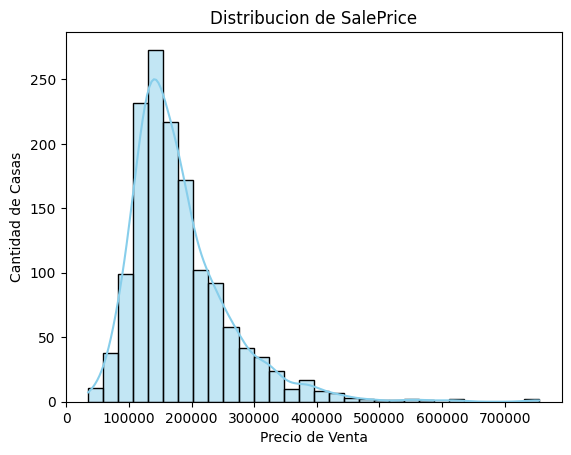

In [79]:
sns.histplot(dftrain['SalePrice'], kde=True, color='skyblue', bins=30).set(title='Distribucion de SalePrice', xlabel='Precio de Venta', ylabel='Cantidad de Casas')

La variable SalePrice sigue una distribución cerca de la normal, con un sesgo hacia la derecha. Esto quiere decir que hay más casas con precios bajos a medios y pocas con precios muy altos. A parte del análisis gráfico, podemos obtener algunos datos adicionales

In [80]:
print(dftrain['SalePrice'].describe())
print("Skewness:", dftrain['SalePrice'].skew())

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.8831110462405252


¿Cuáles variables se correlacionan con la variable objetivo?

In [81]:
# cuántas categorías únicas hay por columna?
print(dftrain.select_dtypes(include=['object']).nunique())

print("Distribucion de categorias por columna: ")
# Distribución de categorías por columna
for col in dftrain.select_dtypes(include=['object']).columns:
    print(dftrain[col].value_counts())

Series([], dtype: float64)
Distribucion de categorias por columna: 


Gracias a este output podemos "observar" de forma rápida, que algunas de las variables como utilities, un poco LandSlope, Condition2 y tal vez otras variables pueden ser eliminadas, pero necesitamos poder justificar, de esta forma igual ya nos podemos hacer una idea de como hay algunas variables que tienen poca relevancia.

### Exploración Variables Categóricas Ordinales
En este paso buscamos obtener más información sobre las variables categóricas ordinales, buscando identificar cómo se distribuyen y que nos dicen sobre las casas del dataset

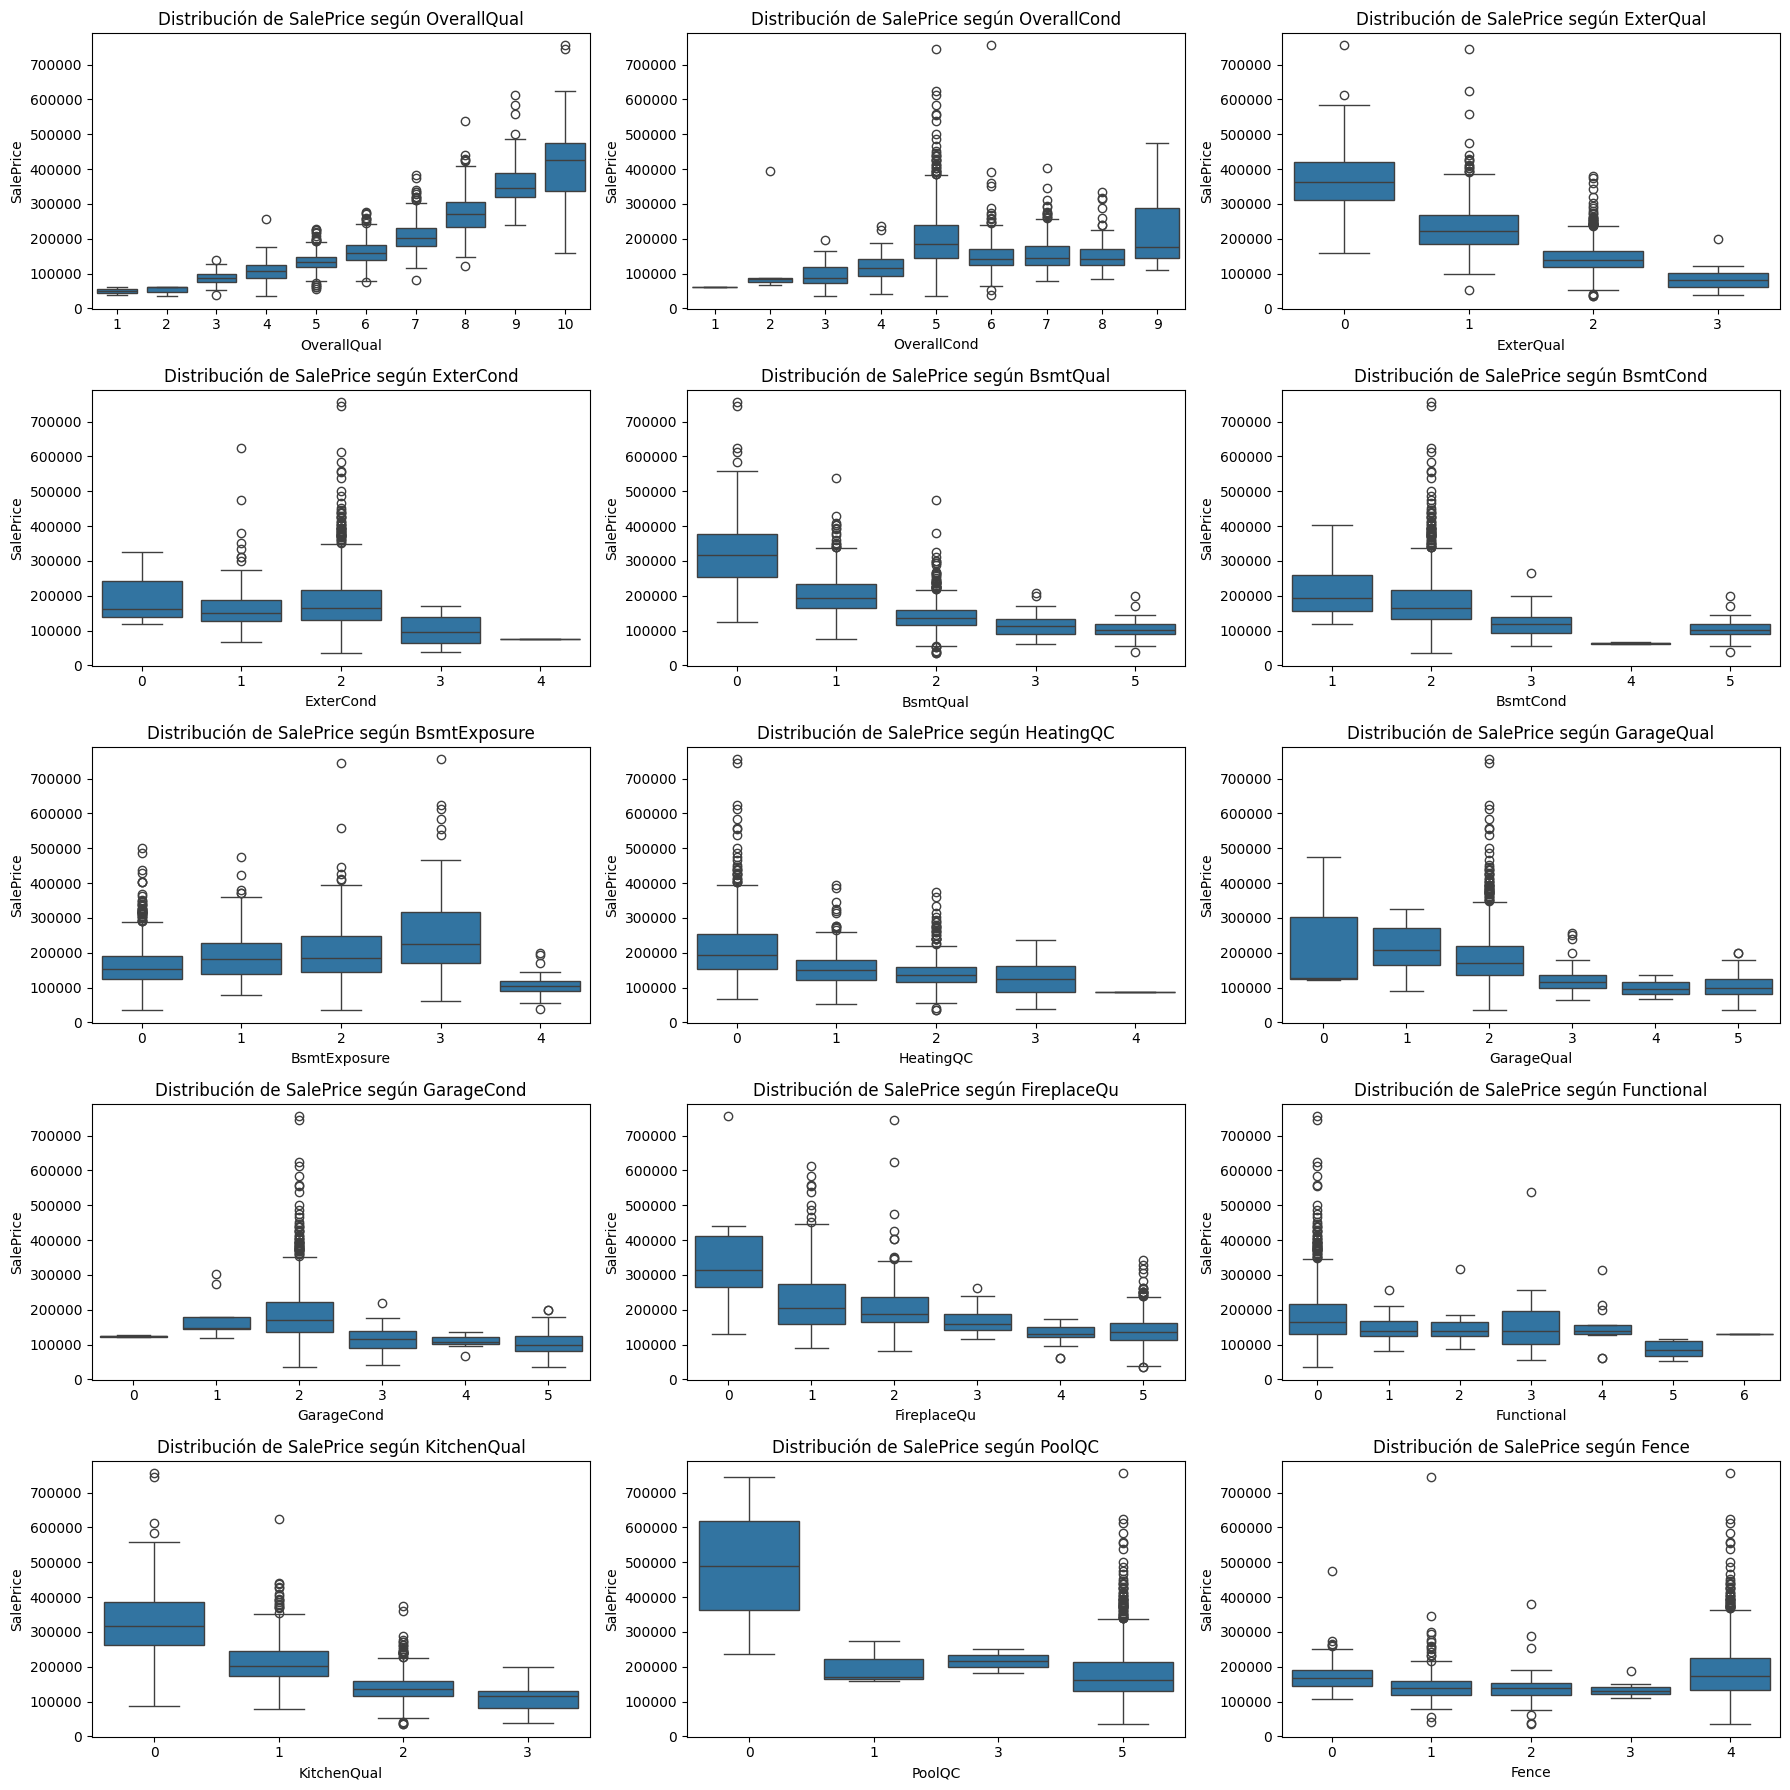

In [82]:
# Generar gráficos para cada variable ordinal con respecto a SalePrice
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(col_ordinales):
    if col in dftrain.columns and dftrain[col].nunique() > 1:
        sns.boxplot(data=dftrain, x=col, y="SalePrice", ax=axes[i])
        axes[i].set_title(f"Distribución de SalePrice según {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("SalePrice")
    else:
        axes[i].axis('off')  # Ocultar gráficos vacíos

plt.tight_layout()
plt.show()


Con base en la información que nos presentan los gráficos anteriores

Podemos concluir que
- La calidad general (OverallQual) es el factor ordinal más importante para determinar SalePrice.
- Las características internas como KitchenQual y FireplaceQu tienen un fuerte impacto en el valor de la vivienda.
- Condiciones estructurales (OverallCond, Functional) tienen menos influencia.
- Elementos adicionales como piscinas pueden elevar significativamente el precio, pero su presencia es rara.

### Exploración Variables Categóricas Nominales

/tmp/ipykernel_4007/1708458750.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


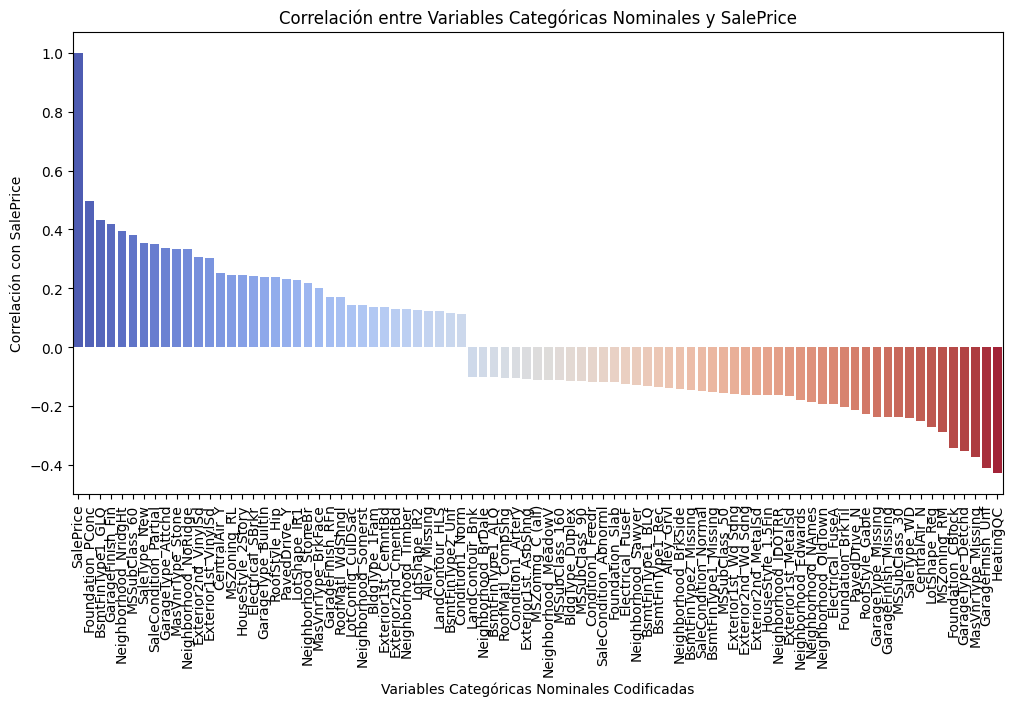

In [83]:
# Seleccionar solo las columnas codificadas
encoded_cols = [col for col in dftrain.columns if any(col.startswith(nom) for nom in col_nominales)]

# Calcular la correlación de las variables categóricas nominales con SalePrice
correlations = dftrain[encoded_cols + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

# Graficar las correlaciones más significativas
correlations = correlations.dropna()
correlations = correlations[correlations.abs() > 0.1]  # Filtrar solo las más relevantes

plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Variables Categóricas Nominales Codificadas")
plt.ylabel("Correlación con SalePrice")
plt.title("Correlación entre Variables Categóricas Nominales y SalePrice")
plt.show()


Con base en la gráfica anterior, podemos observar que

- Ubicación (Neighborhood) es uno de los factores más determinantes en el precio de venta, se menciona por todos los campos que incluyen a (Neighborhood)
- La calidad del cimiento (Foundation), el sótano (BsmtFinType1), el acabado del garaje (GarageFinish) y el tipo de vivienda también influyen significativamente.
- Ciertas configuraciones como garajes separados o sistemas de calefacción deficientes pueden reducir el valor.
- Algunas variables nominales, aunque intuitivamente importantes, tienen una baja correlación y pueden no ser determinantes.

### Exploracion Variables Numéricas

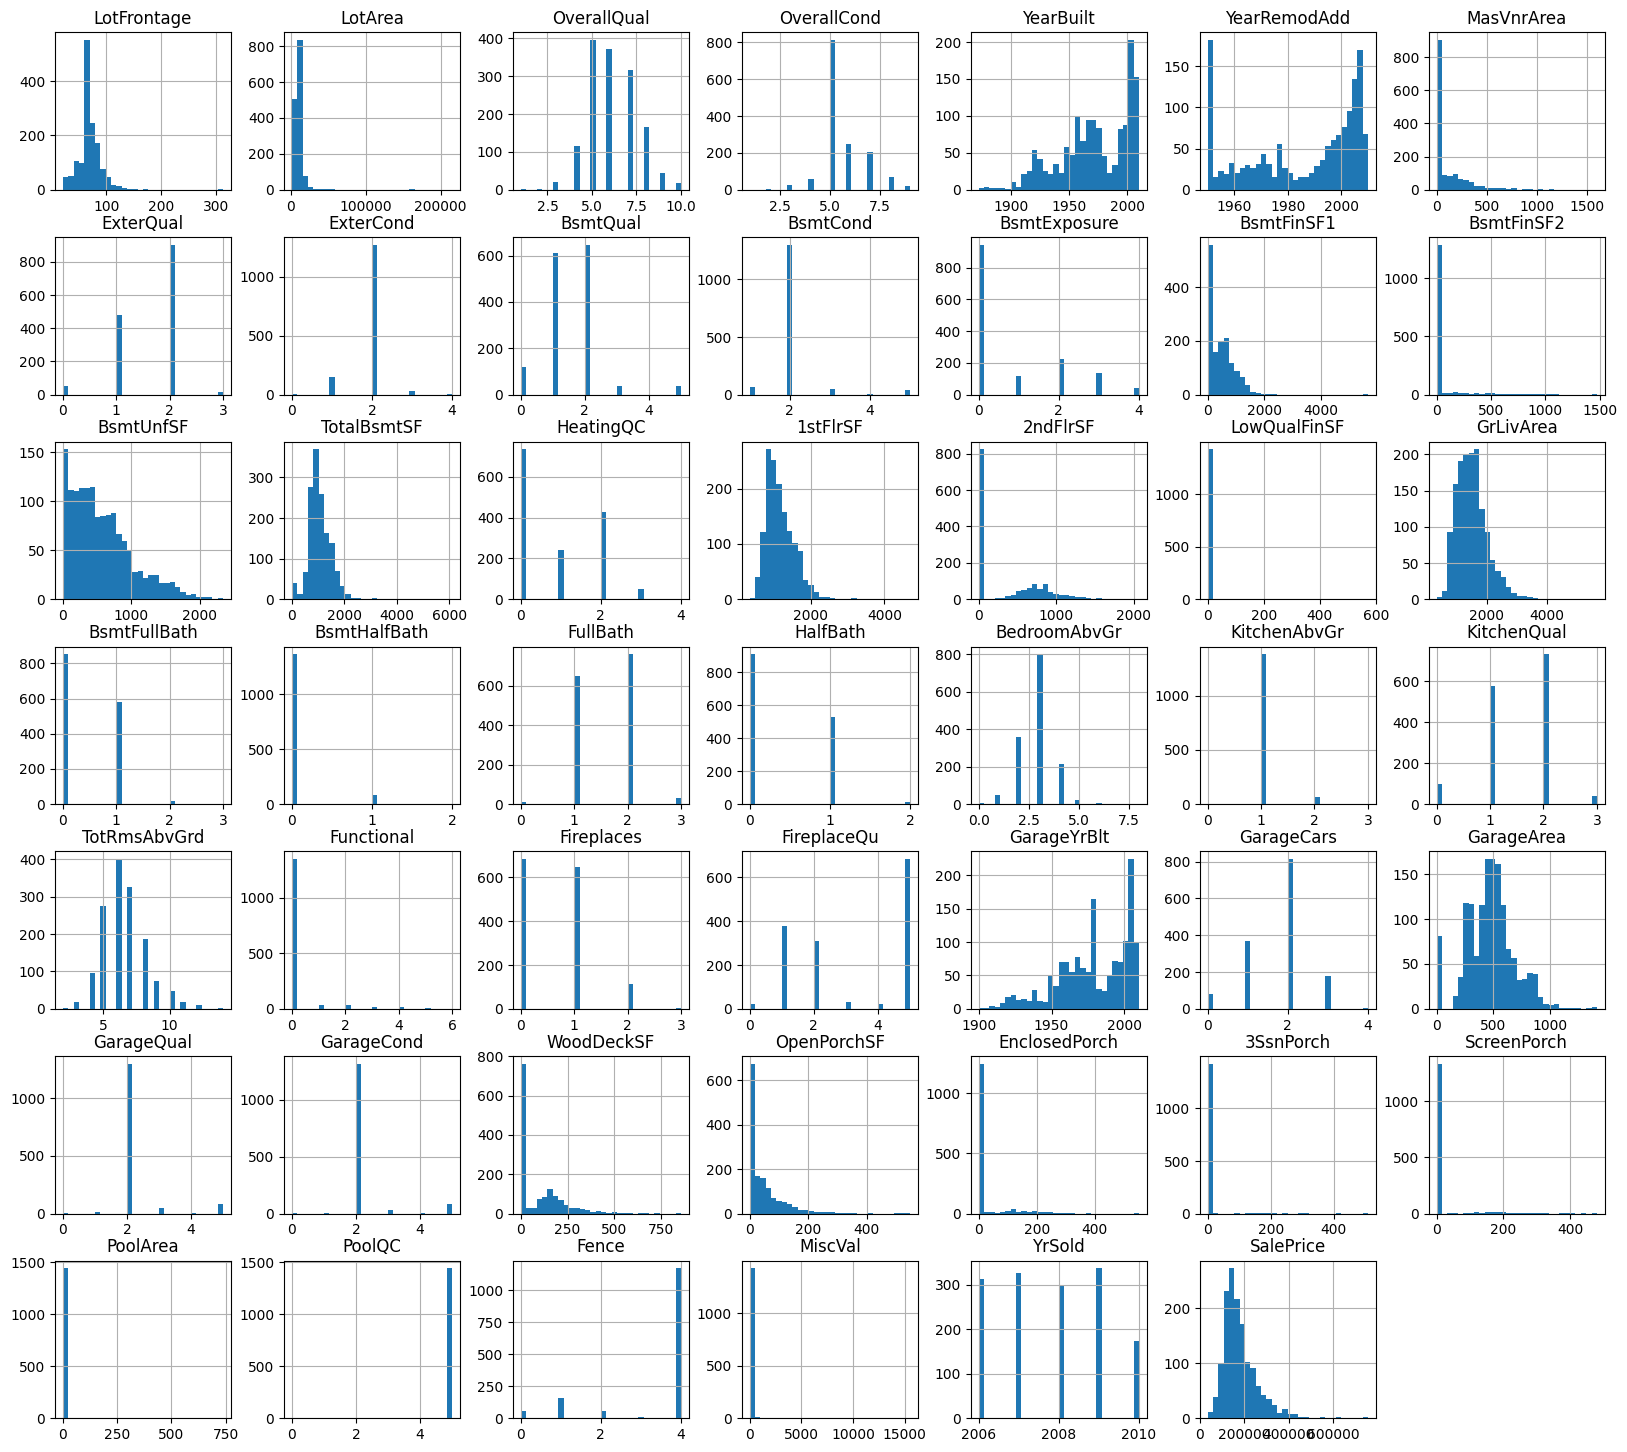

In [84]:
df_num = dftrain.select_dtypes(include = ['float64', 'int64'])
df_num = df_num.drop('Id', axis=1)
# Visualizacion y observacion variables numericas
df_num.hist(figsize=(20, 18), bins=30)
plt.show()

Gracias a esto podemos imaginar que hay bastantes variables con nulas, o como wooddeckSF en donde parece que la varianza es baja podemos identificar tambien que ademas hay bastantes varaibles que pueden sernos de gran utilidad en la busqueda de salesPrice pero sobre todo variables que tienden a una moda y como estas distribuciones que podriamos usar.

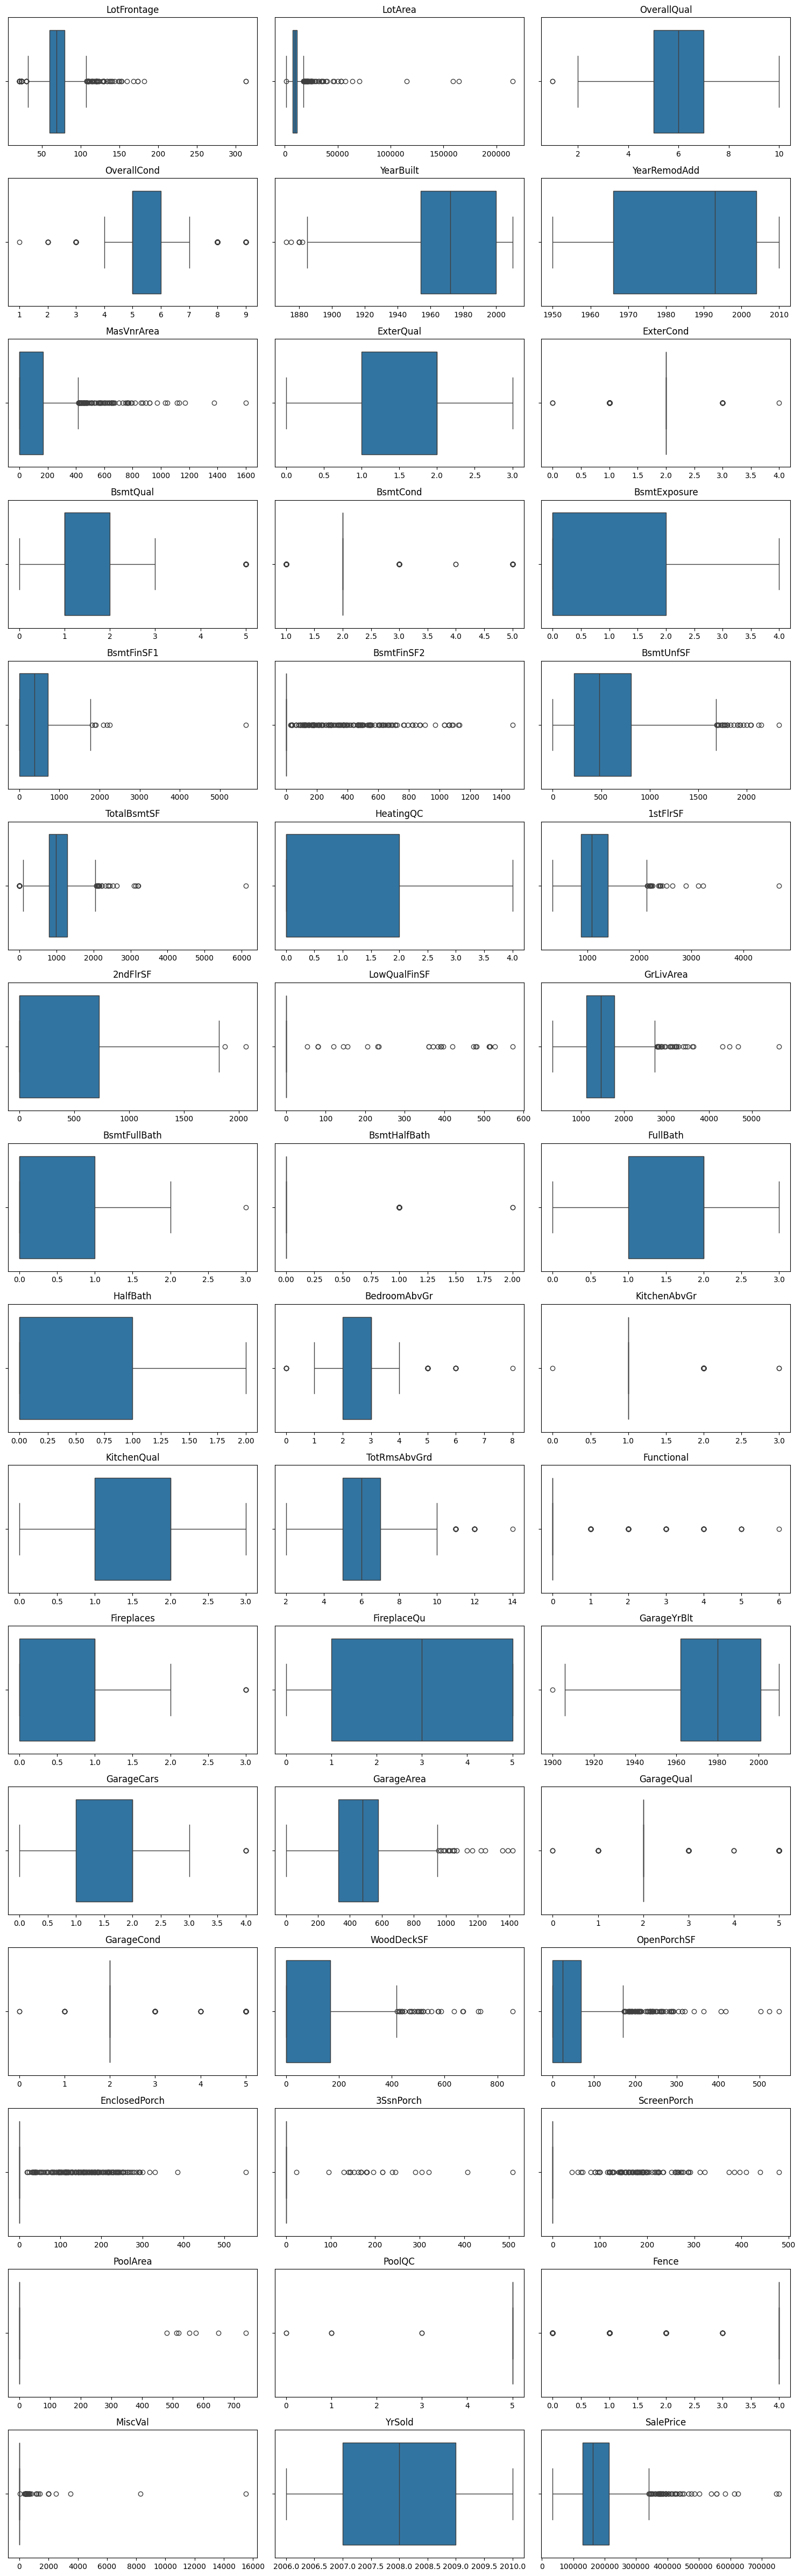

In [85]:
# Crear un solo gráfico con subplots
num_cols = len(df_num.columns)
ncols = 3
nrows = (num_cols // ncols) + (num_cols % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(x=df_num[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")

# Ocultar gráficos vacíos si hay menos columnas que subplots
total_axes = len(axes)
for i in range(num_cols, total_axes):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Segun esto podemos ver que la correlacion entre las variables númericas pero aún asi no podemos descartar ninguna variable porque la correlacion no tienen numeros altos para poder eliminarla con justificacion.

## Separación del modelo

Gracias a ambos analisis, podemos determinar que la variable con mas relacion a SalePrice, es OverallQual, de esta forma para hacer la particion del subconjunto de prueba y entrenamiento, podemos ayudarnos de esta.

Se usará la particion 80/20 de manera que el 80% del dataset(train.csv) se usará para entrenamiento, y el 20% del dataset(train.csv) se usara para prueba.

In [86]:
train_set_strat, test_set_strat = train_test_split(
    dftrain,
    test_size=0.2,
    stratify=dftrain["OverallQual"],
    random_state=42  #Asegura reproducibilidad
)

print("Tamaño de train:", train_set_strat.shape[0])
print("Tamaño de test:", test_set_strat.shape[0])

train_distribution = train_set_strat["OverallQual"].value_counts(normalize=True).sort_index()
test_distribution = test_set_strat["OverallQual"].value_counts(normalize=True).sort_index()

distribution_df = pd.DataFrame({
    "OverallQual": train_distribution.index,
    "Train Proportion": train_distribution,
    "Test Proportion": test_distribution.reindex(train_distribution.index, fill_value=0)
}).reset_index(drop=True)

Tamaño de train: 1160
Tamaño de test: 291


## 1. Regresion con Naive Bayes

Primero separamos los splits X, Y de los sets de entrenamiento y prueba

In [87]:
from sklearn.naive_bayes import GaussianNB

X_train = train_set_strat.drop(columns=['SalePrice'])
Y_train = train_set_strat['SalePrice']

X_test = test_set_strat.drop(columns=['SalePrice'])
Y_test = test_set_strat['SalePrice']

Luego creamos el modelo, lo entrenamos y generamos las predicciones.

In [88]:
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

Por ultimo, generamos una grafica de valores predecidos y reales. Esto con la finalidad de realizar una evaluacion inicial y verificar que no haya habido algun error al entrenar el modelo.

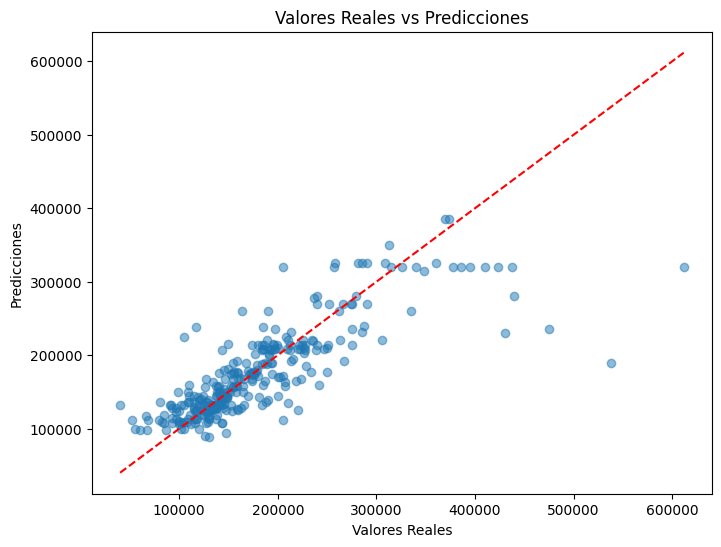

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.show()

## 2. Analisis de Resultados

Métricas de error.


In [90]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  28767.95
MSE:  2308118730.18
RMSE: 48042.88
R²:   0.6503


El RMSE es mayor que el MAE, lo que indica que los errores grandes tienen más peso. Un RMSE cercano a 50 mil dólares puede resultar considerable.

Se observa que hay cierta alineación alrededor de la diagonal roja, lo cual refleja la correlación que respalda el R² de 0.65.

Aun así, se aprecian varios puntos alejados de la diagonal, lo que indica que el modelo subestima o sobreestima en ciertos casos. Es particularmente notorio en el rango de casas con precios más altos (por encima de 300,000 - 350,000) y también en algunos valores intermedios.

Para precios superiores a 400,000, existe mayor dispersión (el modelo a veces predice cerca de 300k o 350k cuando el precio real es mayor). Esto sugiere que el modelo no logra capturar todos los factores que diferencian a las casas muy caras o de rango superior.

Hacemos un análisis de residuos..

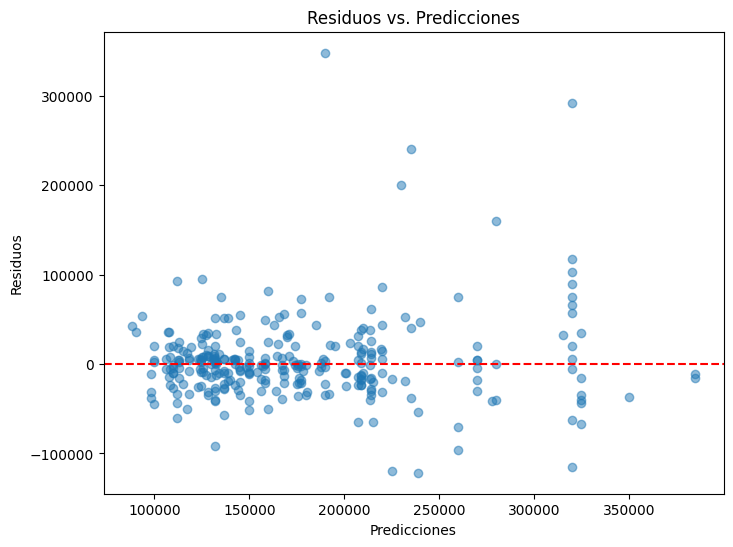

In [91]:
residuals = Y_test - Y_pred

plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuos vs. Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

En el rango de predicciones hasta unos 200k o 250k, muchos residuos están relativamente cerca de 0, lo cual indica que el modelo no comete errores tan grandes en esa zona.

Se observan varios puntos muy por encima de 0 (hasta más de 300k). Esos puntos significan que la casa tenía un valor de venta (real) mucho mayor que la predicción del modelo, por lo cual el modelo está subestimando fuertemente en esos casos.

Suele ocurrir en viviendas de precio elevado o con características especiales que el modelo no está captando bien.

También hay algunos puntos considerablemente por debajo de -100k, significando que en esos casos el modelo sobreestimó el precio de la casa.

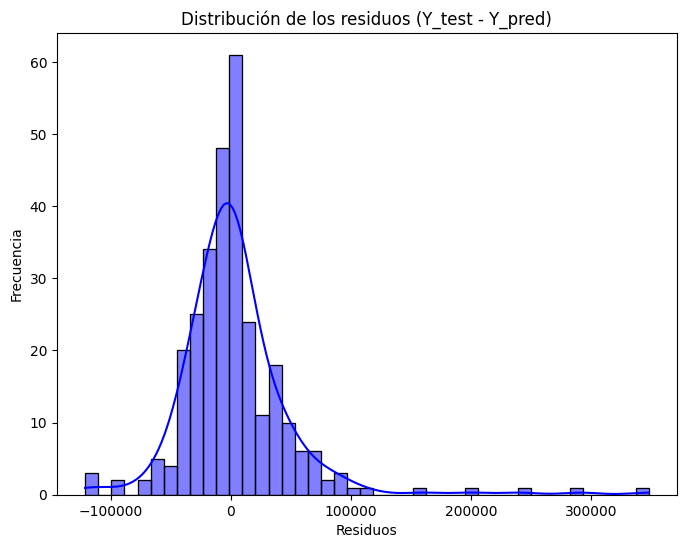

In [92]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title("Distribución de los residuos (Y_test - Y_pred)")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

Se ve un pico principal cerca de 0, lo cual es bueno: la mayor parte de los errores están cerca de 0.

Sin embargo, la cola hacia la derecha (valores de 100,000 o más) es relativamente larga. Esto confirma que hay varios casos en los que el modelo subestima de forma significativa los precios.

La distribución no es perfectamente simétrica (no es exactamente una campana centrada en cero). Esto sugiere que el modelo tiende más a subestimar (errores positivos grandes) que a sobreestimar.

La presencia de algunos errores muy negativos también se ve, pero en menor medida.

## 3. Comparacion con Regresion Lineal y Arbol de Decision

In [93]:
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  28767.95
MSE:  2308118730.18
RMSE: 48042.88
R²:   0.6503


#### Resultados de cada modelo
- Arbol de Regresion
    - R²: 0.71
    - MSE: 1906093576.18

- Regresión Lineal
    - R²: 0.780
    - MSE: 1454743698.07 

- Random Forest
    - R²: 0.82
    - MSE: 1180850274

- Naive Bayes
    - MSE:  2308118730.18
    - R²:   0.6503

### En base a los resultados anteriores podemos concluir lo siguiente:

- Arbol de Regresion

Aunque funciona razonablemente bien (R² de 0.71), tiene un MSE significativamente mayor que los demas modelos utilizados. Los árboles de decisión pueden capturar interacciones no lineales, pero tienden a sobreajustar si no se ajustan correctamente sus hiperparámetros.

- Regresion Lineal

Este modelo muestra mejoras en comparacion a un arbol de regresion simple, con un R² de 0.78 (vs 0.71) y un MSE significativamente menor.

- Random Forest

Este modelo es el que muestra un mejor desempeño hasta el momento en ambas metricas utilizadas, tiene el menor MSE y R². Este modelo toma la habilidad de capturar relaciones no lineales de un arbol de regresion y mejora en cuanto a la generalizacion, esto le da un mejor rendimiento en datos no previamente vistos.


- Naive Bayes

Es el que presenta peor desempeño en la predicción de un valor continuo (SalePrice), puesto que Naive Bayes no está realmente enfocado a un problema de regresión pura (se usa típicamente para clasificación). Su menor R² indica que explica menos la variabilidad de la variable objetivo y su MSE más alto indica que el error es mayor.

### Conclusión
- El modelo de Random Forest es el más preciso de los tres, tanto por tener el R² más alto como por el MSE más bajo.

- Modelo de regresion lineal se posiciona como segundo lugar, con un desempeño aceptable pero no superior a Random Forest.

- Naive Bayes no es un método convencional para predecir valores continuos y sus resultados se ven reflejados en el menor R² y mayor MSE.

## 4. Clasificacion con Naive Bayes

Primero, volvemos a agregar la variable categorica creada en la entrega anterior

In [94]:
def categorize_price(price):
  if price < 85000:
    return 0
  elif price < 225000:
    return 1
  else:
    return 2

train_set_strat['PriceCategory'] = train_set_strat['SalePrice'].apply(categorize_price)
test_set_strat['PriceCategory'] = test_set_strat['SalePrice'].apply(categorize_price)

Luego, separamos en X e Y para ambos splits

In [95]:
X_train = train_set_strat.drop(columns=['SalePrice', 'PriceCategory'])
Y_train = train_set_strat['PriceCategory']

X_test = test_set_strat.drop(columns=['SalePrice', 'PriceCategory'])
Y_test = test_set_strat['PriceCategory']

Por ultimo, creamos y entrenamos el modelo

In [96]:
model = GaussianNB()

model.fit(X_train, Y_train)

GaussianNB()

## 5. Aplicacion del Modelo

Creamos predicciones para el conjunto de prueba utilizando el modelo creado en el inciso anterior

In [97]:
Y_pred = model.predict(X_test)

Luego, obtenemos algunas estadisticas basicas sobre nuestro modelo

In [98]:
print("\nReporte de Clasificación:\n", classification_report(Y_test, Y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.23      1.00      0.37        11
           1       0.98      0.61      0.75       220
           2       0.54      0.95      0.69        60

    accuracy                           0.69       291
   macro avg       0.58      0.85      0.60       291
weighted avg       0.86      0.69      0.72       291



## 6. Analisis con Matriz de Confusion

Creamos y graficamos la matriz de confusion

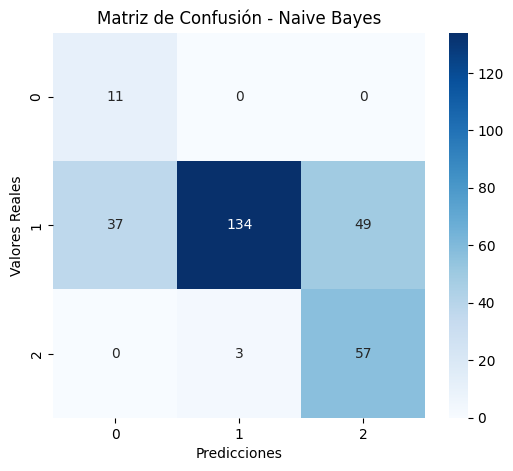

In [99]:
# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)

# Definir etiquetas de clases
class_labels = model.classes_

# Crear el heatmap con Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

**Clase 0 (Casas Economicas)**

Verdaderos positivos: 11

Falsos negativos: 0

Falsos positivos: 37 del grupo 1 (Casas Intermedias)

Al no tener falsos negativos, podemos afirmar que todas las casas economicas fueron correctamente identificadas. Sin embargo, encontramos un problema con los falsos positivos, existen casas intermedias que se estan clasificando como economicas. 

**Clase 1 (Casas Intermedias)**:

Verdaderos Positivos: 134

Falsos negativos: 37 (mal clasificados como clase 0) y 49 (mal clasificados como clase 2)

Falsos Positivos: 3 (de clase 2) que fueron clasificados como clase 1

Existen pocos falsos positivos, esto quiere decir que las casas en otras categorias generalmente no se confuden con las casas intermedias. Sin embargo, tenemos una cantidad grande de falsos negativos, esto nos indica que la categoria de casas intermedia es demasiado "estrecha" y una cantidad significativa se esta confundiendo com Economicas o Caras cuando son intermedias.

Mejor desempeño relativo, pero con confusión importante con clases 0 y 2.

**Clase 2 (Casas Caras)**:

Verdaderos Positivos: 57

Falsos Negativos: 3 (mal clasificados como clase 1)

Falsos Positivos: 49 (del grupo 1) mal clasificados como 2

Existen pocos falsos negativos, indicandonos que las casas Caras se identifican correctamente. Sin embargo, seguimos contando con el problema de lo "estrecha" que es la categoria de casas intermedias, donde algunas de esa categoria se identifican como caras incorrectamente

**Conclusiones**

Acorde a la matriz de confusion, el modelo tuvo un desempeno bastante aceptable. Correctamente identifica las casas de los "extremos", sin embargo, tiene problemas distinguiendo la categoria de casas intermedias. Frecuentemente identificandolas incorrectamente como "Economicas" o "Caras"

## 7. Analisis

Regresando a algunas metricas mencionadas anteriormente, generamos el reporte de clasificacion.

In [100]:
print("\nReporte de Clasificación:\n", classification_report(Y_test, Y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.23      1.00      0.37        11
           1       0.98      0.61      0.75       220
           2       0.54      0.95      0.69        60

    accuracy                           0.69       291
   macro avg       0.58      0.85      0.60       291
weighted avg       0.86      0.69      0.72       291



Estas estadisticas se alinean con el analisis de la matriz de confusion, para las cateogorias "extremas" (0 y 2) tiene muy buen recall (se identifican correctamente los que pertenecen a la categoria) pero poca precision (muchos de la categoria intermedia se identifican incorrectamente). 

Esto puede darse debido a la manera que funciona Naive Bayes, al tener algunas clases mas pequenas puede que algunos de los features presentes causen que nomas se encuentren estas coincidencias se clasifiquen erroneamente.

Por ejemplo, supongamos que todas las casas economicas (al ser pocas, no es poco probable que TODAS las de la muestra tengan alguna caracteristica en comun) tienen un ExterQual < 6. Esto le puede decir al modelo que inmediatamente al encontrar un ExterQual se clasifique como Economica, donde esto puede ser MUY preciso para el recall algunas de las casas intermedias se van a confundir dentro de la clasificacion al compartir esta caracteristica. 

Tambien puede argumentarse que una causa puede ser overfitting, al tener un set de features de las clases que se consideren features "definitivos" (y pueden serlo para el conjunto de prueba) puede que se vea afectada la precision. Para acertar esto, podemos intentar ver el rendimiento en el conjunto de prueba.

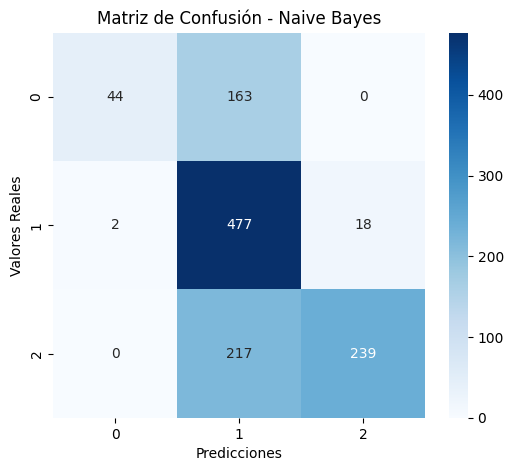

In [101]:
Y_pred_train = model.predict(X_train)

# Calcular la matriz de confusión
cm = confusion_matrix(Y_pred_train, Y_train)

# Definir etiquetas de clases
class_labels = model.classes_

# Crear el heatmap con Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

In [102]:
print("\nReporte de Clasificación:\n", classification_report(Y_pred_train, Y_train))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.21      0.35       207
           1       0.56      0.96      0.70       497
           2       0.93      0.52      0.67       456

    accuracy                           0.66      1160
   macro avg       0.81      0.57      0.57      1160
weighted avg       0.77      0.66      0.63      1160



Parece no existir overfitting, los resultados del conjunto de prueba de hecho parecen tener un rendimiento bastante pobre considerando que los datos ya habian sido vistos anteriormente. Sin embargo, parece que los problemas se dieron "al reves" en este caso, y en vez de tener un recall alto tuvieron una precision alta. Concluimos que las imperfecciones dentro del modelo no se dieron por overfitting, parece mas que el modelo no logra captar las relaciones entre los datos del dataset.

**Explicacion y Conclusiones (Me tomo un buen rato encontrar la razon de los comportamientos)**

Las conjuntos de entrenamiento y prueba no estan separados de manera que las distribuciones de casas economicas, intermedias y caras sea la misma en ambos. Esto se puede ver comparando los reportes de clasificacion, donde en entrenamiento las casas economicas tienen un ratio de 2:5 con las intermedias. Mientras que en el conjunto de entrenamiento, se tiene aproximadamente un ratio de 1:22. Esto quiere decir que Bayes espera encontrar muchas mas casas economicas (o caras) dentro del conjunto de prueba, generando un recall bastante alto (ya que sobre-estima) pero un accuracy bajo.

## 8. Validacion cruzada

Para este modelo decidimos utilizar como puntaje el F1 weighted, asi representamos correctamente la precision del modelo a pesar que algunas de las clases tienen menos representantes en comparacion a los demas.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import numpy as np

dftrain['PriceCategory'] = dftrain['SalePrice'].apply(categorize_price)

# X e Y sin particionar
X = dftrain.drop(columns=["SalePrice", "PriceCategory"])
Y = dftrain["PriceCategory"]

model_cv = GaussianNB()
cv_scores = cross_val_score(model_cv, X, Y, cv=5, scoring='f1_weighted')

print("F1's por fold:", cv_scores)
print("Promedio de F1 (cross-validation):", np.mean(cv_scores))


Accuracies por fold: [0.61806006 0.6752588  0.6886527  0.73488171 0.70194718]
Promedio de accuracy (cross-validation): 0.6837600900512426


El rendimiento utilizando validacion cruzada en promedio tuvo un rendimiento similar (0.72 vs 0.68 en promedio), no podemos decir que ayudo considerablemente a los resultados. Esto puede deberse a algunas particularidades en cuanto al set de datos utilizados, ya que por ejemplo viendo las precisiones por cada fold varian significativamente (0.73 vs 0.62). Puede que la division entre datos de entrenamiento y prueba hayan tenido 'suerte', ya que por razones discutidas anteriormente el modelo esperaba mas valores en los extremos de los que existian anteriormente. Esto contrarresta de cierta manera la naturaleza 'conservadora' de NB y puede resultar en mejores resultados por la forma de los datos y no necesariamente calidad del modelo.

# 9. Ajuste de Hiperparámetros (Tuning)

El principal parametro a variar es var_smoothing, vamos a utilizar un GridSearch con los parametros para encontrar el valor "optimo" y adicionalmente vamos a generar una grafica de los "Weighed F1" para los valores utilizados. Esto nos dara una idea de como se comportan los modelos al variar este parametro, y nos ayudara a encontrar diferentes puntos de interes.

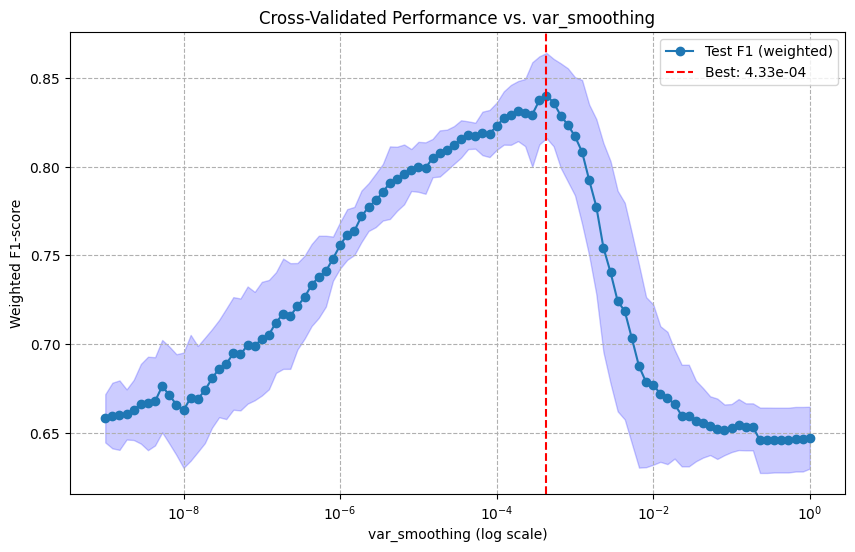

Best var_smoothing: 0.0004328761281083057
Best CV F1-score: 0.8400885971721556


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

params = {'var_smoothing': np.logspace(0, -9, num=100)}

gnb = GaussianNB()
clf = GridSearchCV(gnb, params, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X_train, Y_train)

results = clf.cv_results_
smoothing_values = np.array(results['param_var_smoothing'].data, dtype=float)
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

plt.figure(figsize=(10, 6))
plt.semilogx(smoothing_values, mean_test_scores, label='Test F1 (weighted)', marker='o')
plt.fill_between(smoothing_values,
                 mean_test_scores - std_test_scores,
                 mean_test_scores + std_test_scores,
                 alpha=0.2, color='blue')

best_idx = np.argmax(mean_test_scores)
plt.axvline(x=smoothing_values[best_idx], color='red', linestyle='--',
            label=f'Best: {smoothing_values[best_idx]:.2e}')

plt.xlabel('var_smoothing (log scale)')
plt.ylabel('Weighted F1-score')
plt.title('Cross-Validated Performance vs. var_smoothing')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

print(f"Best var_smoothing: {clf.best_params_['var_smoothing']}")
print(f"Best CV F1-score: {clf.best_score_}")

**Explicacion Grafica**

La grafica generada nos indica el puntaje weighed de F1 (utilizando los puntos azules) al igual que puntos altos / bajos de cada uno de estos puntos.

**Forma de la Grafica**

El parametro de var smoothing es bastante simple, un numero menor es un modelo mas simple mientras que un valor mas alto es un modelo mas complejo pero con una mayor tendencia al overfit. En esta grafica se puede ver muy claramente como se inicia por un modelo bastante simple (con un puntaje sumamente bajo), que mientras va creciendo obtiene mejores puntajes. Luego, al llegar a un pico se empieza a ver el valor descender cuando se recae en el overfitting. Otra parte importante es la varianza en puntajes, donde el lado derecho de la curva (el overfitted) presenta una mayor varianza. Esto se debe exactamente a lo que describimos, mientras mas se apega el modelo a los datos de entrenamiento los peores puntajes seran sumamente bajos en comparacion al promedio.

**Punto de Interes: El valor mas alto**

La forma de la grafica es bastante cercana a lo esperado, fue aumentando hasta llegar a cierto valor pico y luego fue decreciendo. Para este inciso, unicamente vamos a utilizar un valor para el tuning.

**Razonamiento**

El objetivo de utilizar GridSearch y adicionalmente graficar fue encontrar algun comportamiento inusual, como lo pudo haber sido la entrega anterior al aplicar arboles de regresion. Donde la variacion de un parametro generaba una grafica como era de esperarse, luego "perdia el control" y generaba valores alternando entre mas altos y mas bajos de cierta manera oscilando. Esto nos daba espacio para explorar este parametro y evaluar las diferencias entre modelos, sin embargo en este caso tenemos un claro punto de referencia sobre el modelo mas apto para la clasificacion. Al momento de tener una grafica como se muestra y un valor coincidente con el gridsearch, podemos decir con certeza que este es el modelo mas adecuado y describir el comportamiento del modelo para diferentes valores del mismo.

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.55      0.48        11
           1       0.88      0.90      0.89       220
           2       0.74      0.65      0.69        60

    accuracy                           0.84       291
   macro avg       0.68      0.70      0.69       291
weighted avg       0.84      0.84      0.83       291



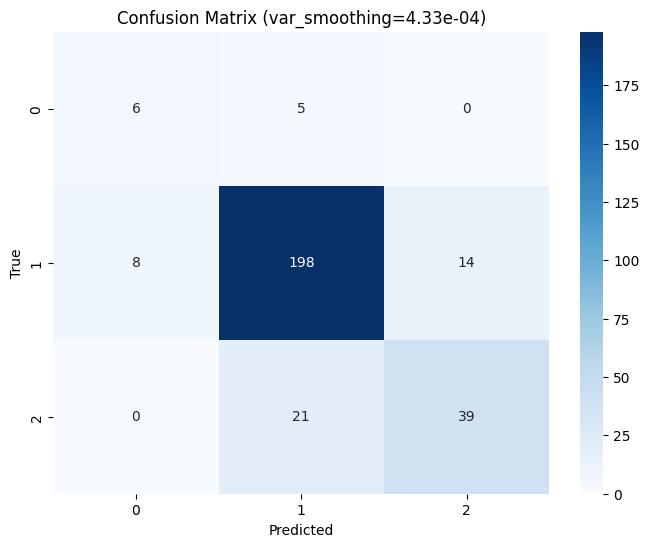

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Train model with your manual var_smoothing
manual_var_smoothing = 0.0004328761281083057
model = GaussianNB(var_smoothing=manual_var_smoothing)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)  # Assuming you have X_test

# 3. Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))  # Assuming you have y_test

# 4. Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (var_smoothing={manual_var_smoothing:.2e})')
plt.show()

Analizando el modelo, podemos observar que define la clase de casas intermedias mucho mejor a las iteraciones anteriores. Unicamente teniendo 22 / 220 falsos negativos, una precision de 0.88 y un recall de 0.90. Este era uno de los puntos debiles de los modelos anteriores. Sin embargo, las categorias menos numerosas se vieron afectadas negativamente. En modelos anteriores, el recall era sumamente alto (al 'sobrepredecir' los valores extremos) pero la precision seguia siendo baja. En este caso, ninguno de los valores fueron altos pero se vieron mas balanceados (por ejemplo, 0.43 y 0.55 en comparacion a 0.23 y 1.00).

**Conclusiones**
- Logramos mejorar el modelo aumentando el F1-Weighed de 0.72 a 0.84 principalmente por medio de la correcta clasificacion de casas intermedias.

- Las clases "extremas" vieron un aumento en su precision, sin embargo se vio afectado su recall. En los modelos anteriores, consideramos esto un 'fluke' ya que se estaban altamente sobre-prediciendo estas categorias.

- Siguen existiendo dificultades encontradas dentro del modelo debido a la distribucion de la variable respuesta, teniendo samples menos numerosos para casas "economicas" y "caras".

- Los modelos mas capaces de predecir correctamente las casas "promedio" seran los mejores puntuados, ya que la metrica utilizada tiene un peso.

# Inciso 10 comparación con Árbol de Decisión y Random Forest

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
# Árbol de decisión
start = time.time()
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, Y_train)
tree_pred = tree_model.predict(X_test)
tree_acc = accuracy_score(Y_test, tree_pred)
tree_time = time.time() - start

# Random Forest
start = time.time()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
rf_time = time.time() - start

# Naive Bayes (ya entrenado antes)
start = time.time()
nb_pred = model.predict(X_test)
nb_acc = accuracy_score(Y_test, nb_pred)
nb_time = time.time() - start

# Resultados
print("Comparación de Modelos:\n")
print(f"Naive Bayes     - Accuracy: {nb_acc:.4f} | Tiempo: {nb_time:.4f} s")
print(f"Árbol Decisión  - Accuracy: {tree_acc:.4f} | Tiempo: {tree_time:.4f} s")
print(f"Random Forest   - Accuracy: {rf_acc:.4f} | Tiempo: {rf_time:.4f} s")


Comparación de Modelos:

Naive Bayes     - Accuracy: 0.6942 | Tiempo: 0.0022 s
Árbol Decisión  - Accuracy: 0.8763 | Tiempo: 0.0419 s
Random Forest   - Accuracy: 0.9107 | Tiempo: 0.2089 s


Con esta comparacion de los tres modelos: Naive Bayes, Árbol de Decisión y Random Forest, usando el mismo conjunto de entrenamiento y prueba. Los resultados fueron:
1. Naive Bayes     - Accuracy: 0.6942 | Tiempo: 0.0021 s
2. Árbol Decisión  - Accuracy: 0.8763 | Tiempo: 0.0385 s
3. Random Forest   - Accuracy: 0.9107 | Tiempo: 0.1857 s



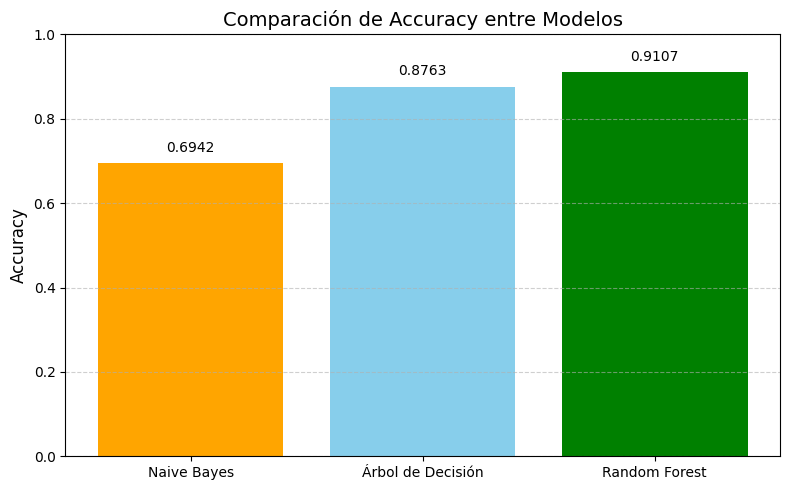

In [107]:
# Modelos y resultados
modelos = ['Naive Bayes', 'Árbol de Decisión', 'Random Forest']
accuracies = [0.6942, 0.8763, 0.9107]
colores = ['orange', 'skyblue', 'green']

# Crear gráfica
plt.figure(figsize=(8, 5))
bars = plt.bar(modelos, accuracies, color=colores)
plt.ylim(0, 1)
plt.title("Comparación de Accuracy entre Modelos", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Añadir etiquetas en las barras
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.02, f'{altura:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Interpretación:
* Naive Bayes
    * Es el más rápido con diferencia (0.0021 s).
    * Tiene el peor desempeño en precisión, probablemente por suposiciones fuertes de independencia entre atributos.
    * Puede servir como modelo base (baseline) rápido para pruebas preliminares.

* Árbol de Decisión
    * Mejora significativamente la precisión respecto a Naive Bayes.

    * Es rápido de entrenar y entender.

    * Aún así, puede caer en sobreajuste si no se poda o regula adecuadamente.

* Random Forest
    * Tiene la mejor precisión (91.07%), lo cual lo convierte en el modelo más efectivo para clasificar precios de casas.
    * Aunque su tiempo de ejecución es mayor, sigue siendo bastante razonable.
    * Es robusto, maneja mejor el ruido y generaliza mejor que un solo árbol.

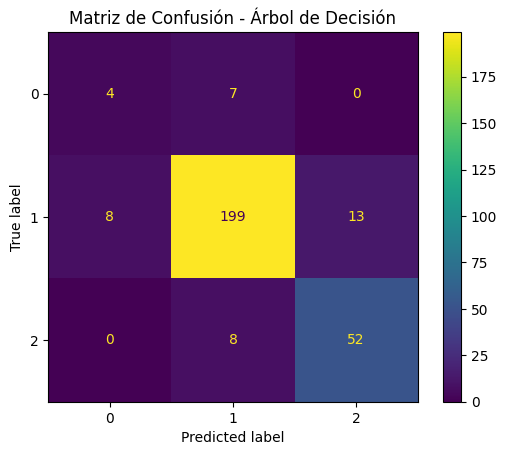

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Árbol de Decisión
cm_tree = confusion_matrix(Y_test, tree_pred)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=model.classes_)
disp_tree.plot(cmap="viridis")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

* Mejora notablemente respecto a Naive Bayes:
    * Clase 1 (media) es clasificada con alta precisión (199/220 correctos).
    * Clase 2 también tiene una buena tasa de aciertos (52/60).
    * La clase 0 mejora (4 aciertos), pero sigue siendo una clase difícil.

Confunde 7 casas baratas como medias, y 13 caras también como medias.

Aún se observan errores, pero menos dispersos que con Naive Bayes.

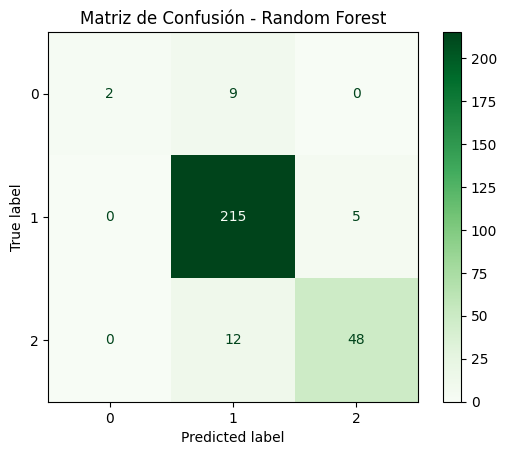

In [109]:
# Random Forest
cm_rf = confusion_matrix(Y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model.classes_)
disp_rf.plot(cmap="Greens")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

* Es el modelo más robusto:
    * Clase 1: 215/220 aciertos → excelente rendimiento.

    * Clase 2: 48/60 aciertos → mejor que árbol y Naive.

    * Clase 0 sigue complicada (2 aciertos), pero los errores se reducen.

La matriz tiene más concentración en la diagonal principal, lo que significa que se equivoca menos y con menos frecuencia.

Confusiones están principalmente entre clases 1 y 2, pero en menor grado.

### Conclusión 
* Random Forest es el mejor modelo de clasificación para este problema.

* Aunque consume más recursos que los otros, su alta precisión lo hace el más confiable.

* Naive Bayes queda como el más rápido, pero no tan eficaz.

* El Árbol de Decisión es un buen punto medio: más preciso que Naive Bayes, pero más rápido que Random Forest.

Las matrices de confusión permiten ver que Random Forest es claramente superior en términos de precisión y consistencia.

## Conclusiones finales

Naive Bayes para regresión no es una técnica comúnmente utilizada, y sus limitaciones se reflejan en su desempeño. A pesar de ello, alcanzó un R² aceptable de 0.65, aunque fue superado por otros modelos como Regresión Lineal Ridge (R² = 0.78) y Árbol de Decisión (R² = 0.71).

Para clasificación por rangos de precios, el modelo de Naive Bayes alcanzó inicialmente una precisión del 69.4%, y tras ajustar su hiperparámetro var_smoothing logró mejorar su rendimiento hasta un 84% de accuracy, evidenciando que el tuning sí tiene impacto.

El Árbol de Decisión tuvo una precisión del 87.6% con una matriz de confusión más limpia que Naive Bayes. Sin embargo, sufre cierta confusión entre clases cercanas (media y cara).

El modelo Random Forest obtuvo el mejor rendimiento general con una precisión de 91.07%, clasificando correctamente la mayoría de los casos y presentando la matriz de confusión más precisa (mayor concentración en la diagonal).

A pesar de que Naive Bayes es significativamente más rápido, su rendimiento es considerablemente inferior, lo cual lo posiciona mejor como un modelo base o de referencia, no como modelo final.

## Recomendaciones: 
Usar Random Forest como modelo principal en tareas de clasificación de precios de vivienda, especialmente cuando se busca precisión.

Realizar tuning de hiperparámetros incluso en modelos simples como Naive Bayes, ya que puede mejorar notablemente los resultados.

Aplicar normalización/estandarización de variables para modelos sensibles a la escala como Naive Bayes 

Evaluar los modelos no solo por métricas globales como el accuracy, sino también usando matrices de confusión, que permiten comprender en qué tipo de casos fallan y tomar decisiones mejor informadas.

Verificar el balance de clases, ya que clases poco representadas (como casas baratas) tienden a ser mal clasificadas.